# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

here is the ananlysis 
 

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how ="left")

# Display the data table for preview

combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice
mouse_count = combined_data["Mouse ID"].value_counts().sum()
mouse_count 

1893

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated_mice = combined_data.groupby("Mouse ID")["Timepoint"].value_counts()
print(Duplicated_mice)

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Name: Timepoint, Length: 1888, dtype: int64


In [35]:
## concatenate function to obtain the unique counts 

# Determine duplicate mice by 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print (duplicate_mice)

['g989']


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_data[combined_data["Mouse ID"] =='g989']
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"] !='g989']

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
mouse_count_cleaned = clean_df["Mouse ID"].value_counts().sum()
mouse_count_cleaned

1880

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#summary_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
#summary_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#summary_stat

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem')
summary_stat

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

/var/folders/73/hc_zb17944z42_dsmk15lr780000gn/T/ipykernel_37635/2604143814.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regimen_counts = clean_df.groupby('Drug Regimen')["Mouse ID", "Timepoint"].size()


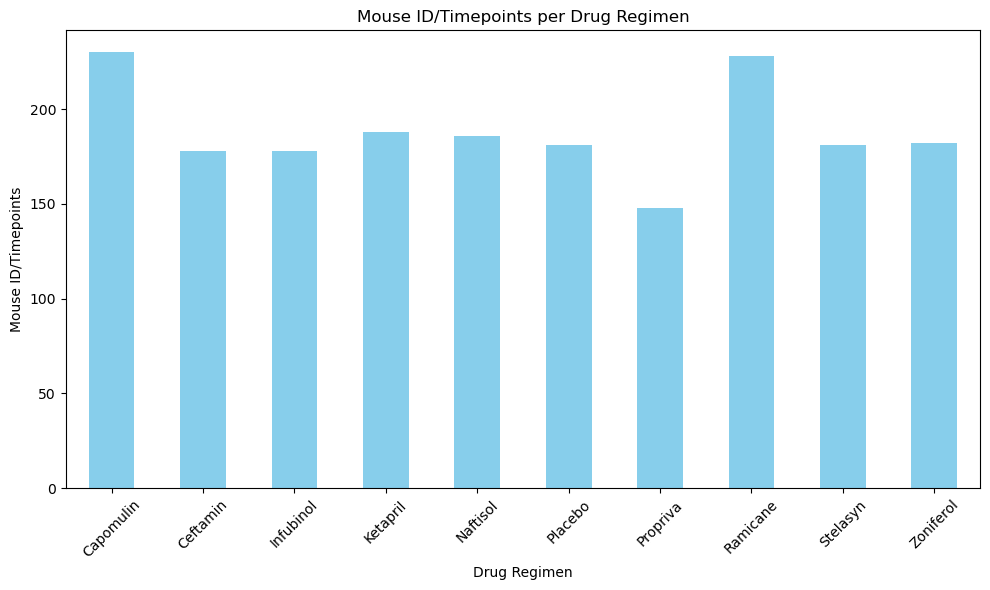

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the DataFrame by 'Drug Regimen' and count the number of rows in each group
regimen_counts = clean_df.groupby('Drug Regimen')["Mouse ID", "Timepoint"].size()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID/Timepoints')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/73/hc_zb17944z42_dsmk15lr780000gn/T/ipykernel_37635/276122240.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regimen_counts = clean_df.groupby('Drug Regimen')["Mouse ID", "Timepoint"].size()


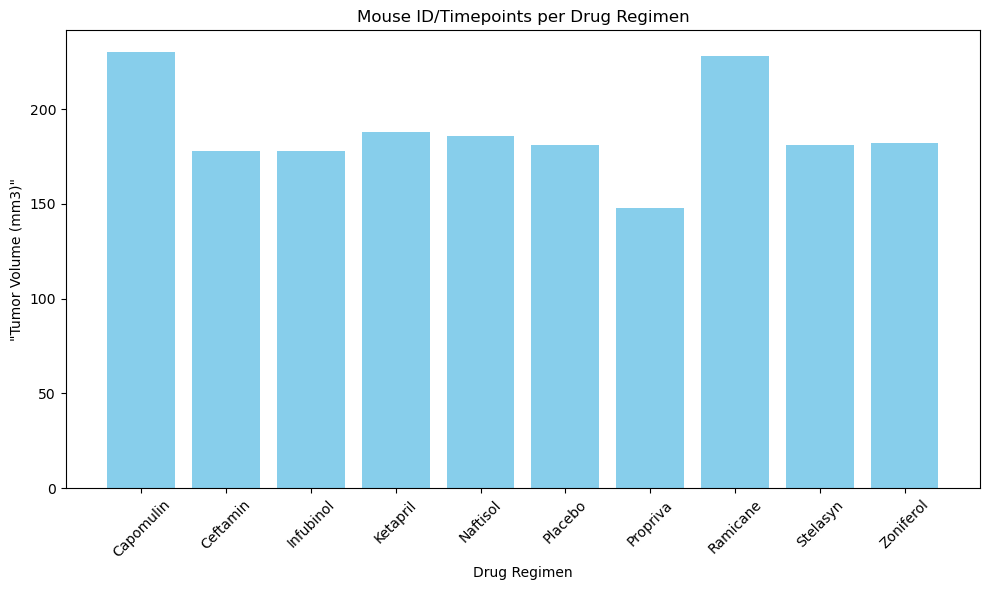

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = clean_df.groupby('Drug Regimen')["Mouse ID", "Timepoint"].size()
# Extract the labels and values for the bar plot
regimen_labels = regimen_counts.index
regimen_values = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_labels, regimen_values, color='skyblue')
plt.title('Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('"Tumor Volume (mm3)"')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


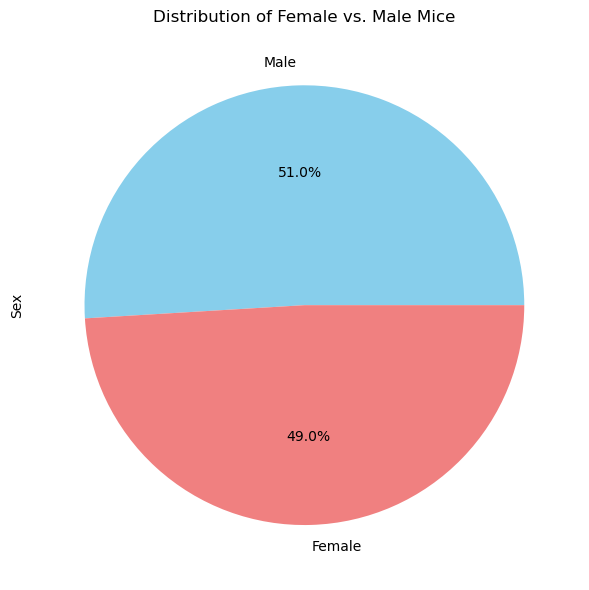

0       Male
1       Male
2       Male
3       Male
4       Male
        ... 
1888    Male
1889    Male
1890    Male
1891    Male
1892    Male
Name: Sex, Length: 1880, dtype: object

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df["Sex"]

# Group the DataFrame by 'Sex' and count the number of mice in each group
sex_counts = gender_df.value_counts()

# Create a pie plot using Pandas
plt.figure(figsize=(6, 6))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female vs. Male Mice')
#plt.ylabel('') 

# Show the plot
plt.tight_layout()
plt.show()



gender_df


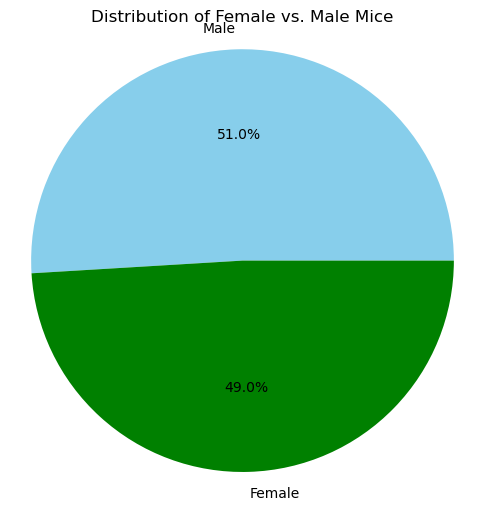

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the DataFrame by 'Sex' and count the number of occurrences
sex_counts = clean_df['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'green'])
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()







## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
DRUG = ["Capomulin", "Ramicane", "Infubinol","Ceftamin" ]
drug_df = clean_df[clean_df["Drug Regimen"].isin(DRUG)]

# Start by getting the last (greatest) timepoint for each mouse
Final_volume = drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
                                
Final_volume
merged_df = clean_df.merge(Final_volume, on='Mouse ID')
merged_df["last_Tumor Volume (mm3)"]= merged_df["Tumor Volume (mm3)_y"]
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y,last_Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126,22.050126
...,...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451,62.754451


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = merged_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Tumor_Volume_(mm3) = merged_df[(merged_df['Tumor Volume (mm3)_x'] < lower_bound) | (merged_df['Tumor Volume (mm3)_x'] > upper_bound)]
outlier_Tumor_Volume_(mm3)

##Print the IQR and potential outliers
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:"
print(outlier_Tumor_Volume_(mm3))

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
Treatments

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1534454823.py, line 19)

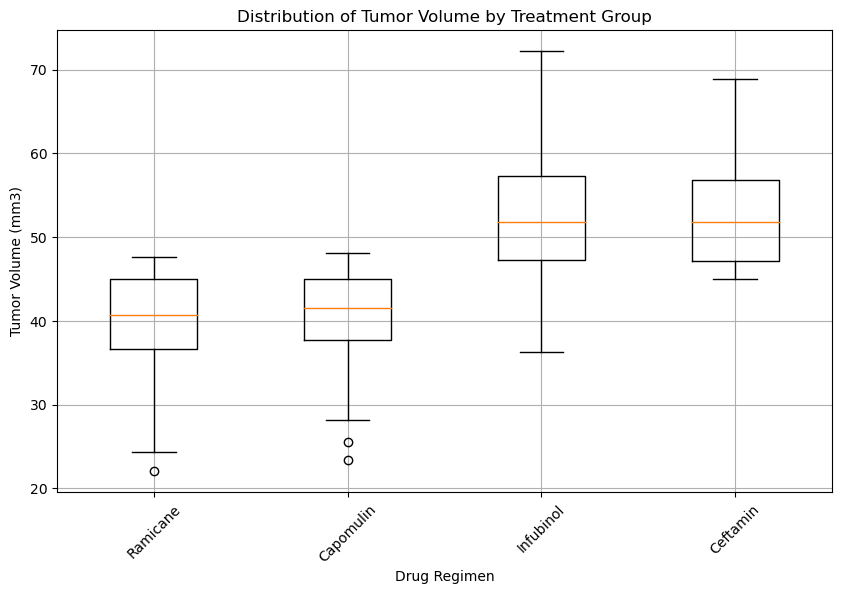

In [96]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of the treatment group names
Treatments = merged_df['Drug Regimen'].unique().tolist()
# Group the data by 'Drug Regimen' and select the 'last_Tumor Volume (mm3)' column
grouped = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)_x']

# Create a list to store the tumor volume data for each group
data_to_plot = [grouped.get_group(drug) for drug in Treatments]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=Treatments)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


## Line and Scatter Plots

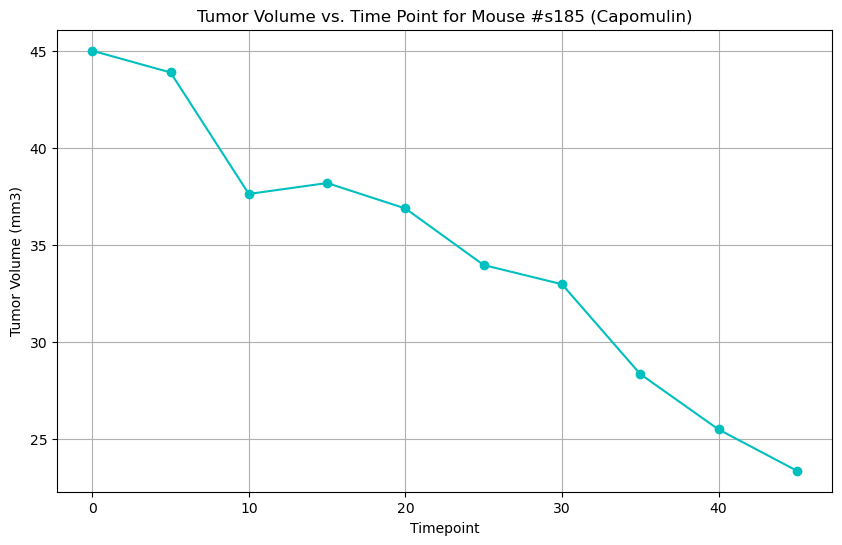

In [107]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filter data for Capomulin treatment
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

#generate  data for a single mouse 's185' 

s185_data = capomulin_df[capomulin_df["Mouse ID"] == "s185"]
s185_data

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(s185_data['Timepoint'], s185_data['Tumor Volume (mm3)_x'], marker='o', linestyle='-', color='c')
plt.title(f'Tumor Volume vs. Time Point for Mouse #s185 (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()







In [105]:
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y,last_Tumor Volume (mm3)
10,s185,Capomulin,Female,3,17,0,45.000000,0,23.343598,23.343598
11,s185,Capomulin,Female,3,17,5,43.878496,0,23.343598,23.343598
12,s185,Capomulin,Female,3,17,10,37.614948,0,23.343598,23.343598
13,s185,Capomulin,Female,3,17,15,38.177232,0,23.343598,23.343598
14,s185,Capomulin,Female,3,17,20,36.866876,0,23.343598,23.343598
...,...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,47.685963,47.685963
702,r157,Capomulin,Male,22,25,0,45.000000,0,46.539206,46.539206
703,r157,Capomulin,Male,22,25,5,45.597064,0,46.539206,46.539206
704,r157,Capomulin,Male,22,25,10,46.059608,0,46.539206,46.539206


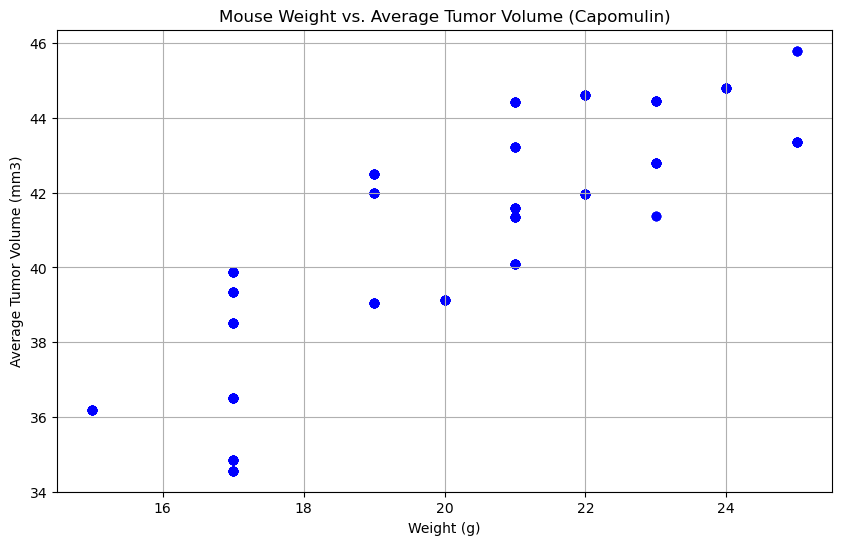

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Filter data for Capomulin treatment
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)_x'].mean()
average_tumor_volume = average_tumor_volume.reset_index()  # Reset the index for merging

# Merge the average tumor volume back with the original DataFrame
capomulin_df = pd.merge(capomulin_df, average_tumor_volume, on='Mouse ID')
capomulin_df = capomulin_df.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)',
                                                'Tumor Volume (mm3)_x_y': 'Average Tumor Volume (mm3)'})

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Average Tumor Volume (mm3)'], marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()

In [112]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x_x,Metastatic Sites,Tumor Volume (mm3)_y,last_Tumor Volume (mm3),Tumor Volume (mm3)_x_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,23.343598,23.343598,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,23.343598,23.343598,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,23.343598,23.343598,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,23.343598,23.343598,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,23.343598,23.343598,34.559143
...,...,...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,47.685963,47.685963,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,46.539206,46.539206,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,46.539206,46.539206,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,46.539206,46.539206,45.798970


## Correlation and Regression

Correlation Coefficient: 0.8343958614425979
Linear Regression Equation: y = 0.96x + 21.49


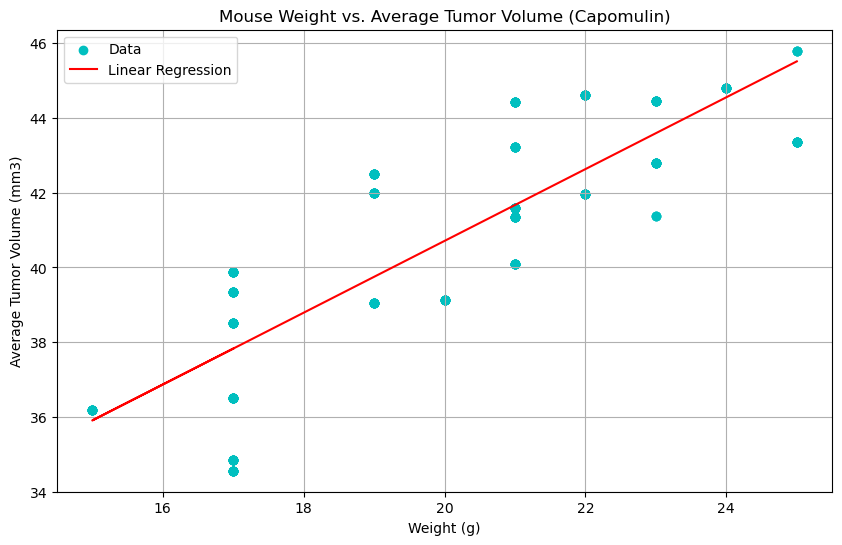

In [116]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Step 3: Calculate the correlation coefficient
correlation_coefficient = capomulin_df['Weight (g)'].corr(capomulin_df['Average Tumor Volume (mm3)'])

# Step 4: Create the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(capomulin_df['Weight (g)'],
                                                         capomulin_df['Average Tumor Volume (mm3)'])

# Step 5: Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Average Tumor Volume (mm3)'], marker='o', color='c', label='Data')
plt.plot(capomulin_df['Weight (g)'], intercept + slope * capomulin_df['Weight (g)'], color='r', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()

# Step 6: Print correlation coefficient and regression equation
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}')

# Show the plot
plt.show()





